<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#数据分析" data-toc-modified-id="数据分析-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据分析</a></span><ul class="toc-item"><li><span><a href="#检查cache_group和ip的对应关系" data-toc-modified-id="检查cache_group和ip的对应关系-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>检查cache_group和ip的对应关系</a></span></li><li><span><a href="#cache_group内的ip数据分析" data-toc-modified-id="cache_group内的ip数据分析-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>cache_group内的ip数据分析</a></span><ul class="toc-item"><li><span><a href="#cache_group内每个ip性能数据的特征" data-toc-modified-id="cache_group内每个ip性能数据的特征-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>cache_group内每个ip性能数据的特征</a></span></li><li><span><a href="#找出ip特征的交集" data-toc-modified-id="找出ip特征的交集-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>找出ip特征的交集</a></span></li><li><span><a href="#cpu_mean_usage及其相关性" data-toc-modified-id="cpu_mean_usage及其相关性-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>cpu_mean_usage及其相关性</a></span></li></ul></li><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>数据预处理</a></span><ul class="toc-item"><li><span><a href="#零方差特征" data-toc-modified-id="零方差特征-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>零方差特征</a></span></li></ul></li><li><span><a href="#PCA" data-toc-modified-id="PCA-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#rate数据" data-toc-modified-id="rate数据-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>rate数据</a></span><ul class="toc-item"><li><span><a href="#同一时刻多个rate数据聚合" data-toc-modified-id="同一时刻多个rate数据聚合-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>同一时刻多个rate数据聚合</a></span></li><li><span><a href="#rate缺失值补充" data-toc-modified-id="rate缺失值补充-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>rate缺失值补充</a></span></li><li><span><a href="#交集内及交集外特征对于达标率的相关性" data-toc-modified-id="交集内及交集外特征对于达标率的相关性-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>交集内及交集外特征对于达标率的相关性</a></span><li><span><a href="#达标率&特征曲线" data-toc-modified-id="达标率&特征曲线-1.5.4"><span class="toc-item-num">1.5.4&nbsp;&nbsp;</span>达标率&特征曲线</a></span></li></ul></li></ul></li></ul></div>

# 数据分析

In [393]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn import preprocessing
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime, timedelta
from tzlocal import get_localzone 
%matplotlib inline

## 检查cache_group和ip的对应关系

In [394]:
cache_group_id_2_ipmd5=pd.read_csv("cache_server_20171206_forfudan.csv")

set_cache=list(cache_group_id_2_ipmd5['machine_ipmd5'])

for i in range(len(set_cache)):
    set_cache[i]=set_cache[i]+'.csv'

file_dir="./machine/20171223"

set_ip=set(os.listdir(file_dir))

In [395]:
set_ip-set(set_cache)

{'20171223.zip'}

In [ ]:
## 按照cache_group把ip分组

cache_group_id_2_ipmd5['ip_num']=1

a=cache_group_id_2_ipmd5['ip_num'].groupby(cache_group_id_2_ipmd5['cache_group_id']).sum()

print("cache_group数量： ", len(a))

cache_group拥有的ip数量由大到小排列

In [314]:
a=a.sort_values(ascending=False)

a

##  cache_group内的ip数据分析

In [388]:
cache_group_selected=36979

### cache_group内每个ip性能数据的特征

cache_group_selected 的ip列表

In [389]:
cache_group_selected_ip_list=list(cache_group_id_2_ipmd5[cache_group_id_2_ipmd5['cache_group_id']==cache_group_selected]['machine_ipmd5'])

In [390]:
len(cache_group_selected_ip_list)  #1131 cache_group有9个ip

5

组内的ip对应的 machine数据特征数 发现特征数量不一致

In [391]:
for st in  cache_group_selected_ip_list:
    dir_="./machine/20171223/"+st+".csv"
    print(pd.read_csv(dir_).shape)

(1440, 1)
(1440, 138)
(1440, 138)
(1440, 138)
(1440, 1)


读取9个ip的machine数据

In [373]:
df_0=pd.read_csv("./machine/20171223/"+cache_group_selected_ip_list[0]+".csv")
df_1=pd.read_csv("./machine/20171223/"+cache_group_selected_ip_list[1]+".csv")
df_2=pd.read_csv("./machine/20171223/"+cache_group_selected_ip_list[2]+".csv")
df_3=pd.read_csv("./machine/20171223/"+cache_group_selected_ip_list[3]+".csv")
df_4=pd.read_csv("./machine/20171223/"+cache_group_selected_ip_list[4]+".csv")
df_5=pd.read_csv("./machine/20171223/"+cache_group_selected_ip_list[5]+".csv")
df_6=pd.read_csv("./machine/20171223/"+cache_group_selected_ip_list[6]+".csv")
df_7=pd.read_csv("./machine/20171223/"+cache_group_selected_ip_list[7]+".csv")
df_8=pd.read_csv("./machine/20171223/"+cache_group_selected_ip_list[8]+".csv")

### 找出ip特征的交集

In [374]:
feature_intersection=list(set(df_1.columns)&set(df_0.columns)&set(df_2.columns)&set(df_3.columns)&set(df_4.columns)&set(df_5.columns)&set(df_6.columns)&set(df_7.columns)&set(df_8.columns))

In [375]:
len(feature_intersection)

59

In [247]:
df_all=pd.concat([df_0[feature_intersection],df_1[feature_intersection],
                 df_2[feature_intersection],df_3[feature_intersection],
                 df_4[feature_intersection],df_5[feature_intersection],
                 df_6[feature_intersection],df_7[feature_intersection],
                df_8[feature_intersection]])

In [249]:
len(feature_intersection)
feature_intersection.sort()
feature_intersection_cpu=feature_intersection[0:24]

In [252]:
feature_intersection

['cpu.usage.cpu0',
 'cpu.usage.cpu1',
 'cpu.usage.cpu10',
 'cpu.usage.cpu11',
 'cpu.usage.cpu12',
 'cpu.usage.cpu13',
 'cpu.usage.cpu14',
 'cpu.usage.cpu15',
 'cpu.usage.cpu16',
 'cpu.usage.cpu17',
 'cpu.usage.cpu18',
 'cpu.usage.cpu19',
 'cpu.usage.cpu2',
 'cpu.usage.cpu20',
 'cpu.usage.cpu21',
 'cpu.usage.cpu22',
 'cpu.usage.cpu23',
 'cpu.usage.cpu3',
 'cpu.usage.cpu4',
 'cpu.usage.cpu5',
 'cpu.usage.cpu6',
 'cpu.usage.cpu7',
 'cpu.usage.cpu8',
 'cpu.usage.cpu9',
 'disk.available.sda3',
 'disk.available.tmpfs',
 'disk.used.sda3',
 'disk.used.tmpfs',
 'ioutil.util.sda',
 'ioutil.util.sdb',
 'ioutil.util.sdc',
 'ioutil.util.sdd',
 'ioutil.util.sde',
 'ioutil.util.sdf',
 'ioutil.util.sdg',
 'ioutil.util.sdh',
 'ioutil.util.sdi',
 'ioutil.util.sdj',
 'ioutil.util.sdk',
 'ioutil.util.sdl',
 'iowait.wait',
 'load.av_load',
 'load.cpu_num',
 'load.total_load',
 'mem.bufers',
 'mem.buffers_cache_free',
 'mem.buffers_cache_used',
 'mem.cached',
 'mem.free',
 'mem.shared',
 'mem.swapusage',
 '

### cpu_mean_usage及其相关性

In [250]:
df_list=[df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8]

In [181]:
i=0
dic={}
for df_ in df_list:
    df_temp=df_[feature_intersection_cpu].apply(lambda x: x.sum(), axis=1)
    dic[i]=df_temp
    i=i+1

cpu_mean_usage=pd.DataFrame(dic)
cpu_mean_usage=cpu_mean_usage/24

In [183]:
cpu_mean_usage.describe()

,0,1,2,3,4,5,6,7,8
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,9.525218,9.223927,16.520014,9.631774,14.236030,9.073404,9.076702,8.891040,9.425195
std,3.735713,3.094766,4.507057,3.086934,3.789784,3.009073,3.082835,2.852629,3.271264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.271500,7.334167,13.309927,7.803937,11.407854,7.277802,7.310333,7.323812,7.522219
50%,8.849146,8.882188,16.199271,9.385708,14.017042,8.863437,8.810104,8.553292,8.849875
75%,11.173896,10.533583,19.329812,10.908531,16.554698,10.293844,10.176573,9.823562,10.832000
max,34.542208,24.492708,31.786583,26.350917,28.119083,23.614625,23.754042,27.303083,27.141625


每个ip的cpu平均利用率的相关性

In [184]:
cpu_mean_usage.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.441810,0.495089,0.481989,0.476306,0.455785,0.460349,0.387689,0.444682
1,0.441810,1.000000,0.416160,0.501075,0.410821,0.450853,0.490658,0.423161,0.455629
2,0.495089,0.416160,1.000000,0.448284,0.719860,0.418699,0.414928,0.396391,0.493297
3,0.481989,0.501075,0.448284,1.000000,0.443698,0.468173,0.499674,0.430139,0.479370
4,0.476306,0.410821,0.719860,0.443698,1.000000,0.405498,0.427217,0.417158,0.518835
5,0.455785,0.450853,0.418699,0.468173,0.405498,1.000000,0.474161,0.405901,0.436255
6,0.460349,0.490658,0.414928,0.499674,0.427217,0.474161,1.000000,0.449267,0.471108
7,0.387689,0.423161,0.396391,0.430139,0.417158,0.405901,0.449267,1.000000,0.463134
8,0.444682,0.455629,0.493297,0.479370,0.518835,0.436255,0.471108,0.463134,1.000000


In [ ]:
corr_test=pd.concat([df_1[['inouttraffic.in.bond0','inouttraffic.out.bond0','inouttraffic.total.bond0']],df_3[['inouttraffic.in.bond0','inouttraffic.out.bond0','inouttraffic.total.bond0']],df_5[['inouttraffic.in.bond0','inouttraffic.out.bond0','inouttraffic.total.bond0']],df_6[['inouttraffic.in.bond0','inouttraffic.out.bond0','inouttraffic.total.bond0']],df_7[['inouttraffic.in.bond0','inouttraffic.out.bond0','inouttraffic.total.bond0']],df_7[['inouttraffic.in.bond0','inouttraffic.out.bond0','inouttraffic.total.bond0']]],axis=1)

## 数据预处理

In [257]:
def data_preprocess(input_df):
    input_null_pos=input_df==-1
    
    input_df[input_null_pos]=np.nan
    input_df=input_df.fillna(method='pad')
    input_df=input_df.fillna(method='backfill')
    input_df=input_df.fillna(value=0)
    scaler=preprocessing.MinMaxScaler().fit(input_df)
    input_scaled=scaler.transform(input_df)
    
    input_scaled_df=pd.DataFrame(input_scaled)
    input_scaled_df.columns=input_df.columns
    input_scaled_df.index=input_df.index
    input_scaled_df[input_null_pos]=-1
    
    return input_scaled_df

In [270]:
df_0.drop('time',axis=1)

ValueError: labels ['time'] not contained in axis

In [271]:
df_0_scaled=data_preprocess(df_0)

In [272]:
df_0_scaled

,channeltraffic.in,channeltraffic.out,cpu.usage.cpu0,cpu.usage.cpu1,cpu.usage.cpu10,cpu.usage.cpu11,cpu.usage.cpu12,cpu.usage.cpu13,cpu.usage.cpu14,cpu.usage.cpu15,...,storeentries.port8106,storeentries.port8107,storeentries.port8108,storeentries.port8109,storeentries.port8110,tcpconn.active,tcpconn.attemptfailed,tcpconn.estab,tcpconn.passive,tcpconn.reset
0,0.100090,0.720965,0.267045,0.277750,0.174613,0.240256,0.135720,0.090785,0.214545,0.034008,...,0.749122,0.864589,0.645819,0.712628,0.734367,0.321933,0.446462,0.160889,0.567276,0.551379
1,0.133300,0.824747,0.186937,0.227902,0.148324,0.236683,0.112917,0.082334,0.080452,0.049409,...,0.749122,0.864589,0.645819,0.712628,0.734367,0.282138,0.432531,0.163660,0.521483,0.535880
2,0.182884,0.788666,0.155154,0.242264,0.112828,0.195479,0.089243,0.116533,0.082558,0.037285,...,0.749122,0.864589,0.645819,0.712628,0.734367,0.302050,0.430085,0.176207,0.552607,0.563777
3,0.155233,0.866179,0.198981,0.320426,0.094559,0.219501,0.095810,0.074088,0.102920,0.054650,...,0.749122,0.864589,0.645819,0.712628,0.734367,0.297277,0.426061,0.168296,0.543086,0.544314
4,0.096339,0.783666,0.176513,0.310088,0.101295,0.185425,0.085864,0.067141,0.088856,0.031804,...,0.749122,0.864589,0.645819,0.712628,0.734367,0.297277,0.426061,0.168296,0.543086,0.544314
5,0.116999,0.869189,0.179327,0.274996,0.105821,0.189662,0.080202,0.088106,0.084024,0.040582,...,0.755572,0.870214,0.651664,0.718662,0.742433,0.313675,0.411080,0.159579,0.543806,0.578843
6,0.106111,0.846257,0.219349,0.274924,0.107510,0.218460,0.063374,0.090435,0.085228,0.032505,...,0.755572,0.870214,0.651664,0.718662,0.742433,0.304158,0.441023,0.153028,0.540099,0.566516
7,0.122951,0.773985,0.153139,0.187194,0.090398,0.192553,0.067120,0.119955,0.062271,0.047265,...,0.755572,0.870214,0.651664,0.718662,0.742433,0.271010,0.404873,0.146478,0.519083,0.545323
8,0.133903,0.842107,0.226373,0.343159,0.123350,0.256971,0.102291,0.082066,0.092579,0.035962,...,0.755572,0.870214,0.651664,0.718662,0.742433,0.290600,0.398443,0.167339,0.536205,0.567670
9,0.168765,0.912333,0.206325,0.272313,0.112307,0.191601,0.068182,0.084952,0.094309,0.052686,...,0.755572,0.870214,0.651664,0.718662,0.742433,0.277599,0.393004,0.177517,0.506868,0.542260


### 零方差特征

In [381]:
df_0_scaled.columns[df_0_scaled.describe().loc["std",:]==0.0]

Index(['disk.available.tmpfs', 'disk.used.tmpfs', 'ipredi.overflow',
       'load.cpu_num', 'mem.shared', 'mem.swapusage', 'mem.total'],
      dtype='object')

## PCA

In [ ]:
pca=PCA(n_components= 50,copy=True)

In [ ]:
new_df_0=pca.fit_transform(df_0_scaled)

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

In [ ]:
new_df_0.shape

## rate数据

In [106]:
hit_rate=pd.read_csv("./rate/2017-12-23_vc.log")

hit_rate_dict=dict(list(hit_rate.groupby(['cache_group_ID'])))

hit_rate_dict

In [109]:
len(hit_rate_dict)

361

In [379]:
hit_rate_df=hit_rate_dict[1131].sort_values('time')

In [380]:
hit_rate_df.shape

(1458, 12)

In [111]:
hit_rate_df['hit_reach_cnt']=0
hit_rate_df[['hit_reach_rate','hit_reach_cnt']]=hit_rate_df[['hit_reach_rate','hit_reach_cnt']].apply(pd.to_numeric)

### 同一时刻多个rate数据聚合

In [112]:
hit_rate_df['hit_reach_cnt']=hit_rate_df['hit_reach_rate']*hit_rate_df['hit_cnt']/100
hit_rate_df_1=hit_rate_df[['time','hit_reach_rate','hit_cnt','hit_reach_cnt']]
hit_rate_df_1.shape

(1458, 4)

In [113]:
hit_rate_df_2=hit_rate_df_1.groupby('time',as_index=False).sum()
hit_rate_df_2['hit_reach_rate']=hit_rate_df_2['hit_reach_cnt']/hit_rate_df_2['hit_cnt']*100

In [114]:
hit_rate_df_2['time']=hit_rate_df_2['time'].astype(dtype='datetime64[ns]')

In [115]:
hit_rate_df_2.shape

(1439, 4)

In [116]:
hit_rate_df_2.set_index("time", inplace=True)

In [119]:
hit_rate_df_2

,hit_reach_rate,hit_cnt,hit_reach_cnt
time,,,
2017-12-23 00:00:00,95.07,203,192.9921
2017-12-23 00:01:00,73.79,187,137.9873
2017-12-23 00:02:00,75.34,215,161.9810
2017-12-23 00:03:00,75.89,195,147.9855
2017-12-23 00:04:00,72.34,235,169.9990
2017-12-23 00:05:00,72.64,223,161.9872
2017-12-23 00:06:00,81.25,192,156.0000
2017-12-23 00:07:00,64.88,225,145.9800
2017-12-23 00:08:00,64.16,173,110.9968


### rate缺失值补充

In [101]:
 index=pd.date_range(start='23/12/2017 00:00',end='23/12/2017 23:59' , freq='min')

full_hit_reach_rate=pd.DataFrame(index=index,dtype=np.float64,
                              columns=['hit_reach_rate'])

full_hit_reach_rate['hit_reach_rate']=hit_rate_df_2['hit_reach_rate']

full_hit_reach_rate[full_hit_reach_rate.isnull().values==True]

In [125]:
full_hit_reach_rate=full_hit_reach_rate.fillna(method='backfill')
#input_df=input_df.fillna(value=0)

In [154]:
full_hit_reach_rate=full_hit_reach_rate.reset_index(drop=False)    #恢复索引 时间列不删除

In [197]:
full_hit_reach_rate

,index,hit_reach_rate
0,2017-12-23 00:00:00,95.07
1,2017-12-23 00:01:00,73.79
2,2017-12-23 00:02:00,75.34
3,2017-12-23 00:03:00,75.89
4,2017-12-23 00:04:00,72.34
5,2017-12-23 00:05:00,72.64
6,2017-12-23 00:06:00,81.25
7,2017-12-23 00:07:00,64.88
8,2017-12-23 00:08:00,64.16
9,2017-12-23 00:09:00,70.08


### 交集内及交集外特征对于达标率的相关性

In [185]:
out_of_intersection=df_0[list(set(df_0.columns)-set(feature_intersection))]

In [186]:
a=list(set(df_0.columns)-set(feature_intersection))
a.sort()
a

['channeltraffic.in',
 'channeltraffic.out',
 'disk.available.flowcollect',
 'disk.available.sdb1',
 'disk.available.sdc1',
 'disk.available.sdd1',
 'disk.available.sde1',
 'disk.available.sdf1',
 'disk.available.sdg1',
 'disk.available.sdh1',
 'disk.available.sdi1',
 'disk.available.sdj1',
 'disk.available.sdk1',
 'disk.available.sdl1',
 'disk.used.flowcollect',
 'disk.used.sdb1',
 'disk.used.sdc1',
 'disk.used.sdd1',
 'disk.used.sde1',
 'disk.used.sdf1',
 'disk.used.sdg1',
 'disk.used.sdh1',
 'disk.used.sdi1',
 'disk.used.sdj1',
 'disk.used.sdk1',
 'disk.used.sdl1',
 'flowperproc.allReqCnt',
 'flowperproc.port8101',
 'flowperproc.port8102',
 'flowperproc.port8103',
 'flowperproc.port8104',
 'flowperproc.port8105',
 'flowperproc.port8106',
 'flowperproc.port8107',
 'flowperproc.port8108',
 'flowperproc.port8109',
 'flowperproc.port8110',
 'fms_response.resptime',
 'hitratio.port8101',
 'hitratio.port8102',
 'hitratio.port8103',
 'hitratio.port8104',
 'hitratio.port8105',
 'hitratio.po

In [187]:
feature_intersection

['cpu.usage.cpu0',
 'cpu.usage.cpu1',
 'cpu.usage.cpu10',
 'cpu.usage.cpu11',
 'cpu.usage.cpu12',
 'cpu.usage.cpu13',
 'cpu.usage.cpu14',
 'cpu.usage.cpu15',
 'cpu.usage.cpu16',
 'cpu.usage.cpu17',
 'cpu.usage.cpu18',
 'cpu.usage.cpu19',
 'cpu.usage.cpu2',
 'cpu.usage.cpu20',
 'cpu.usage.cpu21',
 'cpu.usage.cpu22',
 'cpu.usage.cpu23',
 'cpu.usage.cpu3',
 'cpu.usage.cpu4',
 'cpu.usage.cpu5',
 'cpu.usage.cpu6',
 'cpu.usage.cpu7',
 'cpu.usage.cpu8',
 'cpu.usage.cpu9',
 'disk.available.sda3',
 'disk.available.tmpfs',
 'disk.used.sda3',
 'disk.used.tmpfs',
 'ioutil.util.sda',
 'ioutil.util.sdb',
 'ioutil.util.sdc',
 'ioutil.util.sdd',
 'ioutil.util.sde',
 'ioutil.util.sdf',
 'ioutil.util.sdg',
 'ioutil.util.sdh',
 'ioutil.util.sdi',
 'ioutil.util.sdj',
 'ioutil.util.sdk',
 'ioutil.util.sdl',
 'iowait.wait',
 'load.av_load',
 'load.cpu_num',
 'load.total_load',
 'mem.bufers',
 'mem.buffers_cache_free',
 'mem.buffers_cache_used',
 'mem.cached',
 'mem.free',
 'mem.shared',
 'mem.swapusage',
 '

In [188]:
out_of_intersection=out_of_intersection.fillna(method='pad')
out_of_intersection=out_of_intersection.fillna(method='backfill')
out_of_intersection=out_of_intersection.fillna(value=0)

In [189]:
out_of_intersection.shape

(1440, 79)

In [190]:
full_hit_reach_rate

,index,hit_reach_rate
0,2017-12-23 00:00:00,95.07
1,2017-12-23 00:01:00,73.79
2,2017-12-23 00:02:00,75.34
3,2017-12-23 00:03:00,75.89
4,2017-12-23 00:04:00,72.34
5,2017-12-23 00:05:00,72.64
6,2017-12-23 00:06:00,81.25
7,2017-12-23 00:07:00,64.88
8,2017-12-23 00:08:00,64.16
9,2017-12-23 00:09:00,70.08


In [191]:
out_of_intersection['hit_reach_rate']=full_hit_reach_rate['hit_reach_rate']

交集外的特征跟达标率的相关系数

In [192]:
out_of_intersection.corr().loc['hit_reach_rate',:]

hitratio.port8103             0.004200
hitratio.port8107             0.021447
disk.available.flowcollect    0.165657
flowperproc.port8103         -0.137776
disk.available.sdb1           0.244953
resptime.resp.resp8101        0.002807
disk.available.sdg1           0.204772
flowperproc.port8105         -0.122040
disk.available.sdi1           0.166416
flowperproc.port8101         -0.161734
resptime.resp.resp8105       -0.016731
disk.used.sdc1               -0.252825
flowperproc.port8109         -0.114723
resptime.resp.resp8109        0.016777
flowperproc.port8110         -0.145320
flowperproc.port8107         -0.108451
disk.used.sdk1                0.029594
ipredi.allsumflow            -0.135693
hitratio.port8101             0.031452
storeentries.port8109        -0.175175
disk.available.sde1           0.143308
flowperproc.port8104         -0.211645
resptime.resp.resp8107       -0.029958
ipredi.errflow                0.026736
storeentries.allStoreECnt    -0.169414
storeentries.port8107    

In [193]:
in_intersection=df_0[feature_intersection]
in_intersection=in_intersection.fillna(method='pad')
in_intersection=in_intersection.fillna(method='backfill')
in_intersection=in_intersection.fillna(value=0)

In [194]:
in_intersection['hit_reach_rate']=full_hit_reach_rate['hit_reach_rate']

In [195]:
in_intersection.corr().loc['hit_reach_rate',:]

cpu.usage.cpu0           -0.129896
cpu.usage.cpu1           -0.150588
cpu.usage.cpu10          -0.113637
cpu.usage.cpu11          -0.160736
cpu.usage.cpu12          -0.058351
cpu.usage.cpu13          -0.027073
cpu.usage.cpu14          -0.030887
cpu.usage.cpu15          -0.051898
cpu.usage.cpu16          -0.031859
cpu.usage.cpu17          -0.058472
cpu.usage.cpu18          -0.045524
cpu.usage.cpu19          -0.025648
cpu.usage.cpu2           -0.181853
cpu.usage.cpu20          -0.055860
cpu.usage.cpu21          -0.036177
cpu.usage.cpu22          -0.129099
cpu.usage.cpu23          -0.087444
cpu.usage.cpu3           -0.154418
cpu.usage.cpu4           -0.148595
cpu.usage.cpu5           -0.136514
cpu.usage.cpu6           -0.139121
cpu.usage.cpu7           -0.163939
cpu.usage.cpu8           -0.126618
cpu.usage.cpu9           -0.146697
disk.available.sda3       0.140530
disk.available.tmpfs           NaN
disk.used.sda3           -0.140530
disk.used.tmpfs                NaN
ioutil.util.sda     

### 达标率&特征曲线

In [225]:
full_hit_reach_rate.rename(columns={'index':'time'}, inplace = True)

In [226]:
full_hit_reach_rate

,time,hit_reach_rate
0,2017-12-23 00:00:00,95.07
1,2017-12-23 00:01:00,73.79
2,2017-12-23 00:02:00,75.34
3,2017-12-23 00:03:00,75.89
4,2017-12-23 00:04:00,72.34
5,2017-12-23 00:05:00,72.64
6,2017-12-23 00:06:00,81.25
7,2017-12-23 00:07:00,64.88
8,2017-12-23 00:08:00,64.16
9,2017-12-23 00:09:00,70.08


In [277]:
full_hit_reach_rate['time']=full_hit_reach_rate['time']-timedelta(hours=8)

In [278]:
full_hit_reach_rate

,time,hit_reach_rate
0,2017-12-22 16:00:00,95.07
1,2017-12-22 16:01:00,73.79
2,2017-12-22 16:02:00,75.34
3,2017-12-22 16:03:00,75.89
4,2017-12-22 16:04:00,72.34
5,2017-12-22 16:05:00,72.64
6,2017-12-22 16:06:00,81.25
7,2017-12-22 16:07:00,64.88
8,2017-12-22 16:08:00,64.16
9,2017-12-22 16:09:00,70.08


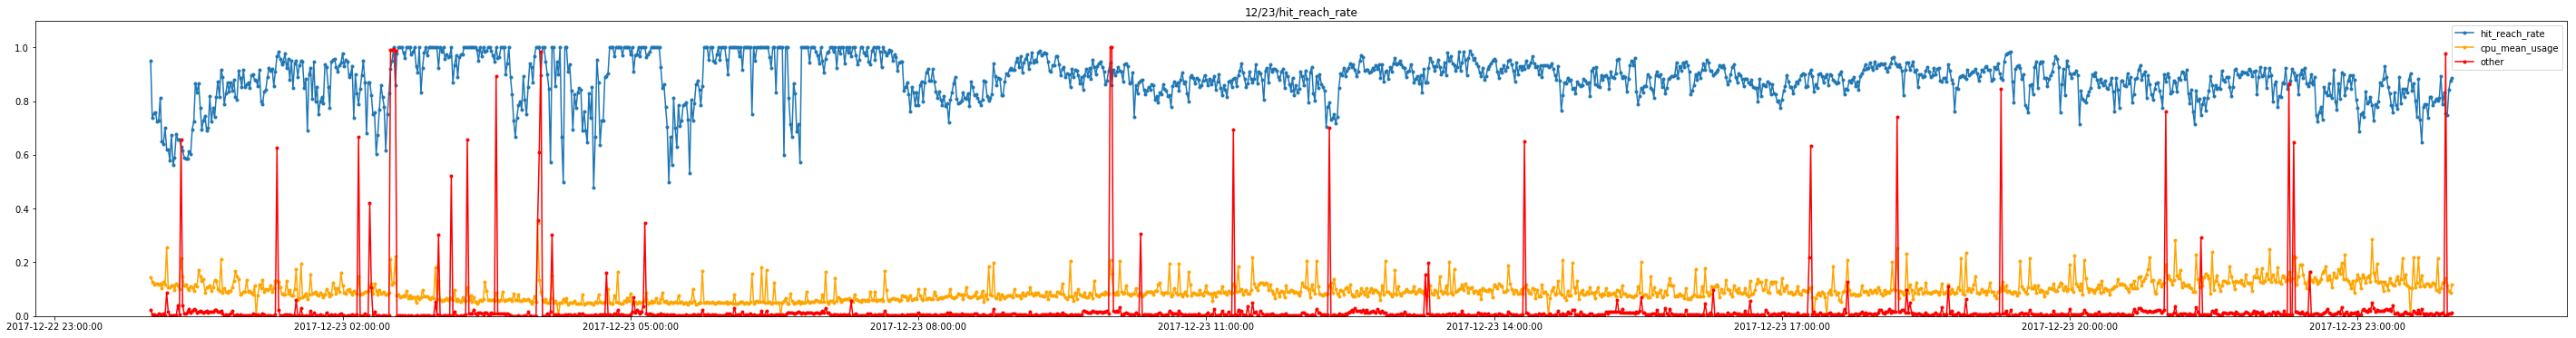

In [387]:
local_tz = get_localzone()
xfmt = mpl.dates.DateFormatter('%Y-%m-%d %H:%M:%S',tz=local_tz)

plt.figure(figsize=(50,6)) 
plt.title("12/23/hit_reach_rate")
plt.plot(full_hit_reach_rate.time.values, (full_hit_reach_rate['hit_reach_rate']/100).values, '.-',label="hit_reach_rate")
plt.plot(full_hit_reach_rate.time.values, df_0[feature_intersection_cpu].apply(lambda x: x.sum(), axis=1).values/2400, '.-',label="cpu_mean_usage", color="orange")
#plt.plot(full_hit_reach_rate.time.values, df_0_scaled['disk.available.sda3'].values, '.-',label="other", color="red")
plt.plot(full_hit_reach_rate.time.values, df_0_scaled['ioutil.util.sda'].values, '.-',label="other", color="red")

ax=plt.gca()
ax.set_ylim([0,1.1])
ax.xaxis.set_major_formatter(xfmt)

plt.legend()
plt.show()
#'iowait.wait' 'cpu_mean_usage'  'load.av_load'  'load.total_load' 'tcpconn.active'!   
#'tcpconn.attemptfailed' 'tcpconn.estab'  'tcpconn.passive'  'tcpconn.reset'

In [238]:
full_hit_reach_rate['time']=full_hit_reach_rate['time']+timedelta(hours=8)

In [273]:
feature_intersection

['cpu.usage.cpu0',
 'cpu.usage.cpu1',
 'cpu.usage.cpu10',
 'cpu.usage.cpu11',
 'cpu.usage.cpu12',
 'cpu.usage.cpu13',
 'cpu.usage.cpu14',
 'cpu.usage.cpu15',
 'cpu.usage.cpu16',
 'cpu.usage.cpu17',
 'cpu.usage.cpu18',
 'cpu.usage.cpu19',
 'cpu.usage.cpu2',
 'cpu.usage.cpu20',
 'cpu.usage.cpu21',
 'cpu.usage.cpu22',
 'cpu.usage.cpu23',
 'cpu.usage.cpu3',
 'cpu.usage.cpu4',
 'cpu.usage.cpu5',
 'cpu.usage.cpu6',
 'cpu.usage.cpu7',
 'cpu.usage.cpu8',
 'cpu.usage.cpu9',
 'disk.available.sda3',
 'disk.available.tmpfs',
 'disk.used.sda3',
 'disk.used.tmpfs',
 'ioutil.util.sda',
 'ioutil.util.sdb',
 'ioutil.util.sdc',
 'ioutil.util.sdd',
 'ioutil.util.sde',
 'ioutil.util.sdf',
 'ioutil.util.sdg',
 'ioutil.util.sdh',
 'ioutil.util.sdi',
 'ioutil.util.sdj',
 'ioutil.util.sdk',
 'ioutil.util.sdl',
 'iowait.wait',
 'load.av_load',
 'load.cpu_num',
 'load.total_load',
 'mem.bufers',
 'mem.buffers_cache_free',
 'mem.buffers_cache_used',
 'mem.cached',
 'mem.free',
 'mem.shared',
 'mem.swapusage',
 '

In [280]:
df_0_scaled['disk.available.sda3'].values

array([ 0.57293705,  0.57901635,  0.57505699, ...,  0.06613875,
        0.06291935,  0.05914377])

In [307]:
df_0_scaled.describe().loc["std",:]

0.0

In [384]:
print(df_0.columns)

Index(['time', 'channeltraffic.in', 'channeltraffic.out', 'cpu.usage.cpu0',
       'cpu.usage.cpu1', 'cpu.usage.cpu10', 'cpu.usage.cpu11',
       'cpu.usage.cpu12', 'cpu.usage.cpu13', 'cpu.usage.cpu14',
       ...
       'storeentries.port8106', 'storeentries.port8107',
       'storeentries.port8108', 'storeentries.port8109',
       'storeentries.port8110', 'tcpconn.active', 'tcpconn.attemptfailed',
       'tcpconn.estab', 'tcpconn.passive', 'tcpconn.reset'],
      dtype='object', length=138)
